[0 1]


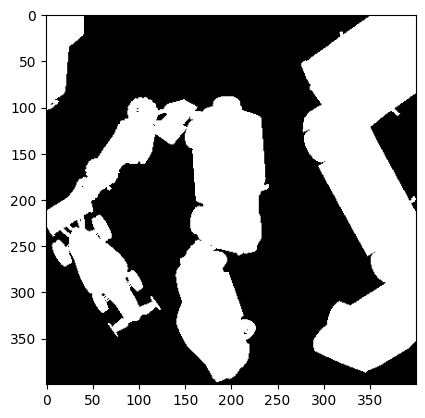

In [2]:
# code\UsefullnessOfDepth\datasets\foreground_background\SynthDet_cars_foreground_background_complex_texture_fgbg\labels\test_0.png
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open(r"..\datasets\foreground_background\SynthDet_cars_foreground_background_complex_texture_fgbg\labels\test_0.png")
image = np.array(image)

print(np.unique(image))
plt.imshow(image, cmap="gray")
plt.show()

In [12]:
# Utils
import sys
sys.path.append("../")
import os
import importlib
from PIL import Image

from utils.dataloader.dataloader import get_train_loader,get_val_loader
from utils.dataloader.RGBXDataset import RGBXDataset
import importlib
import torch
import matplotlib.pyplot as plt
import numpy as np

config_path = r"..\configs\SynthDet\SynthDet_template_DFormer_Tiny.py"
config_module = importlib.import_module("configs.SUNRGBD.SUNRGBD_DFormer_Tiny")
config = config_module.config

dataset_path = r"..\datasets\SUNRGBD"
rgb_root_folder = r"..\datasets\SUNRGBD\RGB"
gt_root_folder = r"..\datasets\SUNRGBD\labels"
x_root_folder = r"..\datasets\SUNRGBD\Depth"
train_source = r"..\datasets\SUNRGBD\train.txt"
eval_source = r"..\datasets\SUNRGBD\test.txt"

new_dataset_location = r"..\datasets\SynthDet_SUNRGBD_subset"
if not os.path.exists(new_dataset_location):
    os.makedirs(new_dataset_location)

if not os.path.exists(os.path.join(new_dataset_location, "RGB")):
    os.makedirs(os.path.join(new_dataset_location, "RGB"))

if not os.path.exists(os.path.join(new_dataset_location, "Depth")):
    os.makedirs(os.path.join(new_dataset_location, "Depth"))

if not os.path.exists(os.path.join(new_dataset_location, "labels")):
    os.makedirs(os.path.join(new_dataset_location, "labels"))

rgb_image_filenames = [f for f in os.listdir(rgb_root_folder)]
gt_image_filenames = [f for f in os.listdir(gt_root_folder)]
x_image_filenames = [f for f in os.listdir(x_root_folder)]

rgb_image_filenames = sorted(rgb_image_filenames)
gt_image_filenames = sorted(gt_image_filenames)
x_image_filenames = sorted(x_image_filenames)

for (rgb_image_filename, depth_image_filename, label_image_filename) in zip(rgb_image_filenames, x_image_filenames, gt_image_filenames):
    # rgb_image = Image.open(os.path.join(rgb_root_folder, rgb_image_filename))
    # depth_image = Image.open(os.path.join(x_root_folder, depth_image_filename))
    label_image = Image.open(os.path.join(gt_root_folder, label_image_filename))

    # rgb_image = np.array(rgb_image)
    # depth_image = np.array(depth_image)
    label_image = np.array(label_image)

    if 4 in np.unique(label_image):
        # new_rgb_image = Image.fromarray(rgb_image)
        # new_depth_image = Image.fromarray(depth_image)
        # new_label_image = Image.fromarray(label_image)

        # new_rgb_image.save(os.path.join(new_dataset_location, f"RGB/{rgb_image_filename}"))
        # new_depth_image.save(os.path.join(new_dataset_location, f"Depth/{depth_image_filename}"))
        # new_label_image.save(os.path.join(new_dataset_location, f"labels/{label_image_filename}"))


        if "train" in rgb_image_filename:
            with open(os.path.join(new_dataset_location, "train.txt"), "a") as f:
                f.write(f"RGB/{rgb_image_filename} labels/{label_image_filename}\n")
        else:
            with open(os.path.join(new_dataset_location, "test.txt"), "a") as f:
                f.write(f"RGB/{rgb_image_filename} labels/{label_image_filename}\n")

    

In [4]:
import numpy as np
datarange = np.linspace(0.001, 5, 10)
datarange

array([1.00000000e-03, 5.56444444e-01, 1.11188889e+00, 1.66733333e+00,
       2.22277778e+00, 2.77822222e+00, 3.33366667e+00, 3.88911111e+00,
       4.44455556e+00, 5.00000000e+00])

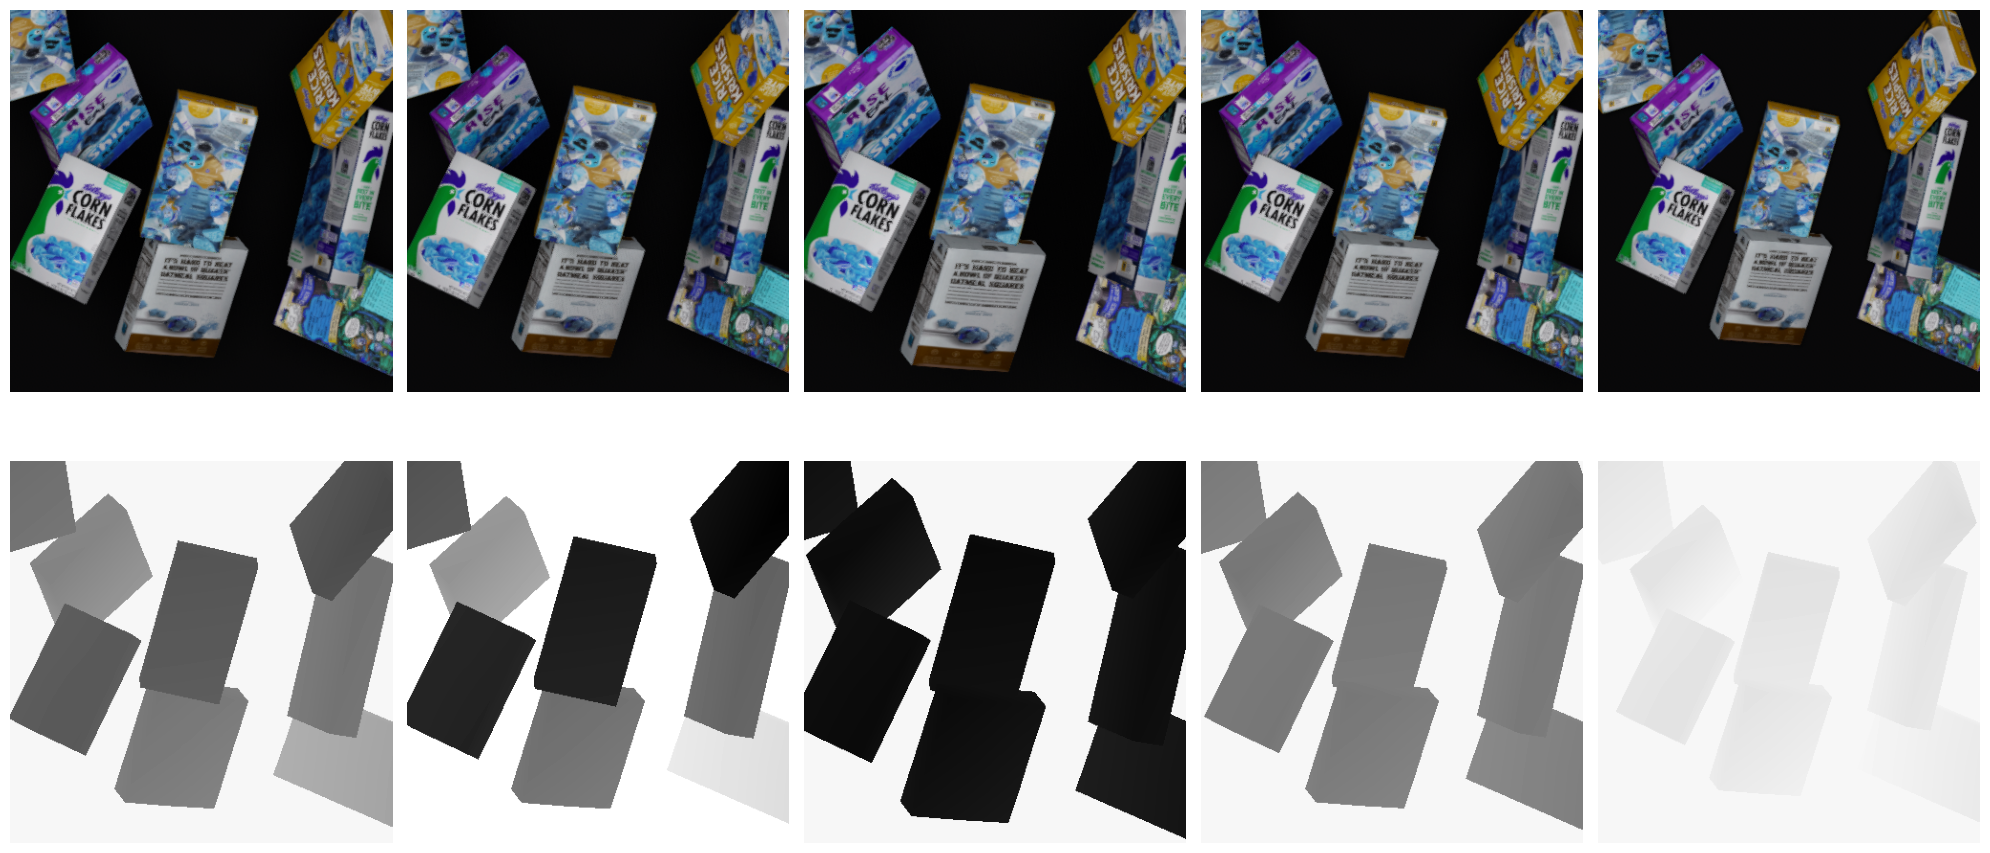

In [9]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# code\UsefullnessOfDepth\datasets\spatial\SynthDet_groceries_spatial_large_depth
spatial_large_path = r"..\datasets\spatial\SynthDet_groceries_spatial_large_depth"
spatial_medium_path = r"..\datasets\spatial\SynthDet_groceries_spatial_medium_depth"
spatial_small_close_path = r"..\datasets\spatial\SynthDet_groceries_spatial_small_depth_close"
spatial_small_far_path = r"..\datasets\spatial\SynthDet_groceries_spatial_small_depth_far"
spatial_small_avg_path = r"..\datasets\spatial\SynthDet_groceries_spatial_small_depth_avg"

depth_folder = "Depth"
RGB_folder = "RGB"
test_image = "test_0.png"

fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for i, path in enumerate([spatial_small_close_path, spatial_small_avg_path, spatial_small_far_path, spatial_medium_path, spatial_large_path]):
    depth_image = cv2.imread(os.path.join(path, depth_folder, test_image), cv2.IMREAD_UNCHANGED)
    rgb_image = cv2.imread(os.path.join(path, RGB_folder, test_image), cv2.IMREAD_UNCHANGED)

    ax[0, i].imshow(rgb_image)
    ax[0, i].axis("off")

    ax[1, i].imshow(depth_image, cmap="gray", vmin=0, vmax=255)
    ax[1, i].axis("off")

plt.tight_layout()
plt.show()


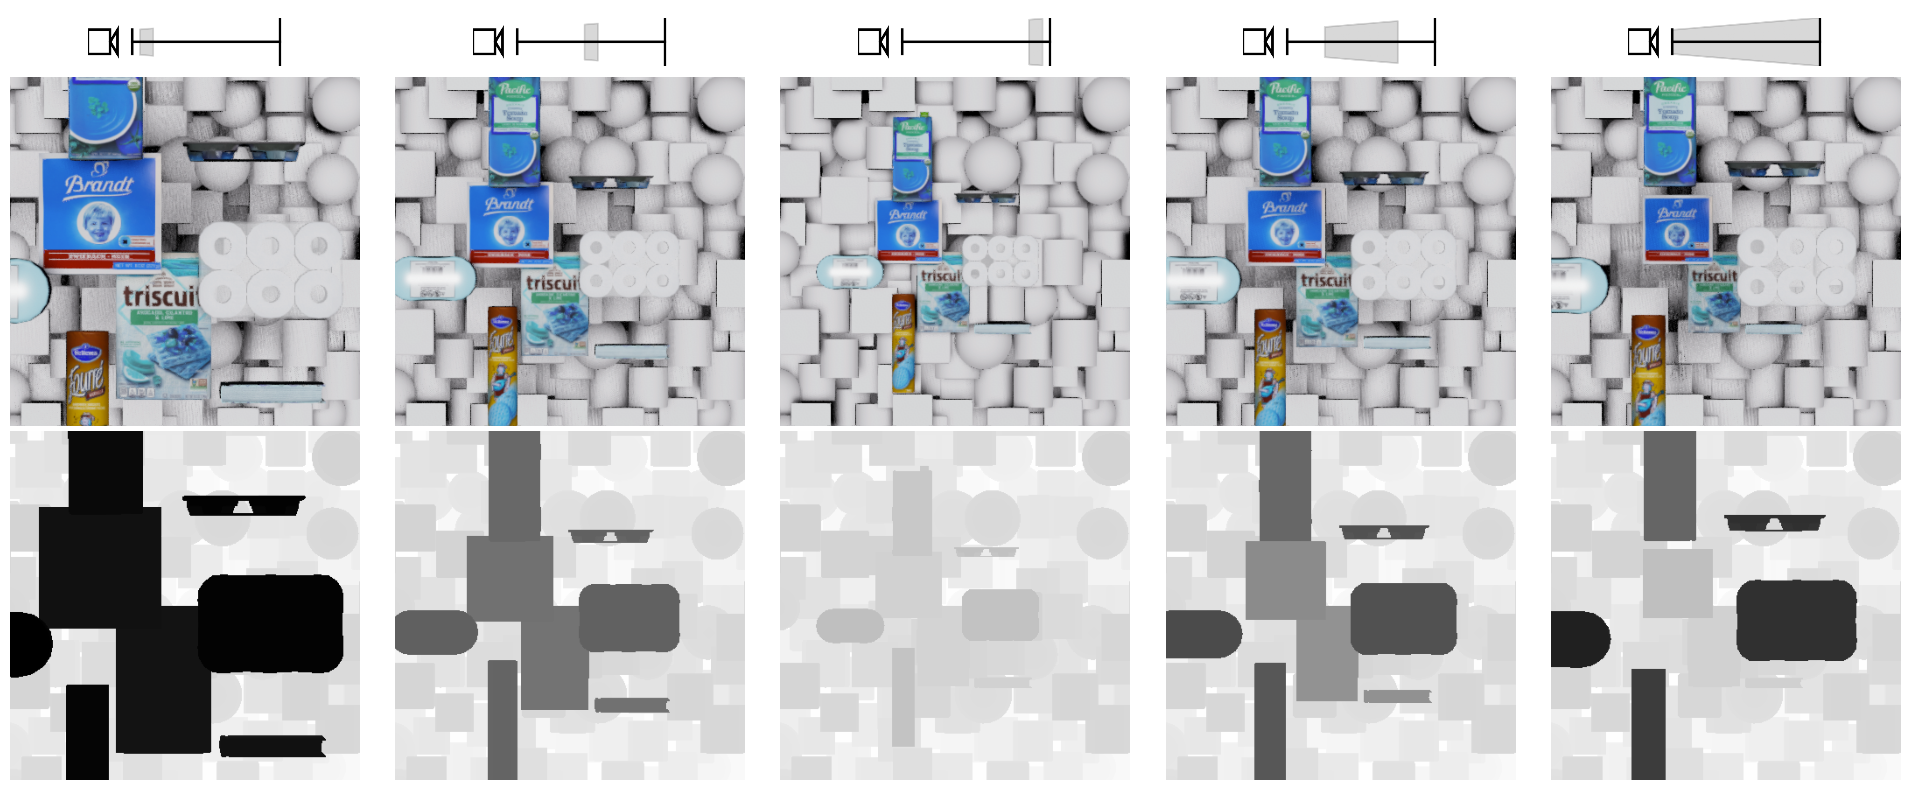

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import numpy as np

spatial_full_path = r"..\datasets\test_suite_spatial_realistic_no_walls\SynthDet_spatial_bg_full"
spatial_medium_path = r"..\datasets\test_suite_spatial_realistic_no_walls\SynthDet_spatial_bg_medium"
spatial_close_path = r"..\datasets\test_suite_spatial_realistic_no_walls\SynthDet_spatial_bg_close"
spatial_half_path = r"..\datasets\test_suite_spatial_realistic_no_walls\SynthDet_spatial_bg_half"
spatial_far_path = r"..\datasets\test_suite_spatial_realistic_no_walls\SynthDet_spatial_bg_far"

depth_folder = "Depth"
RGB_folder = "RGB"
test_image = "test_0.png"

range_names = ['close', 'half', 'far', 'medium', 'full']
fig, ax = plt.subplots(2, 5, figsize=(19.5, 8))
# increase font size
plt.rcParams.update({'font.size': 16})
for i, path in enumerate([spatial_close_path, spatial_half_path, spatial_far_path, spatial_medium_path, spatial_full_path]):
    depth_image = cv2.imread(os.path.join(path, depth_folder, test_image), cv2.IMREAD_UNCHANGED)
    rgb_image = cv2.imread(os.path.join(path, RGB_folder, test_image), cv2.IMREAD_UNCHANGED)

    # Load the image
    img = mpimg.imread(f'images/{range_names[i]}.png')
    
    # Create an OffsetImage
    imagebox = OffsetImage(img, zoom=0.3)
    
    # Create AnnotationBbox to place the image on the plot
    ab = AnnotationBbox(imagebox, (0.5, 1.1), frameon=False, xycoords='axes fraction', boxcoords="axes fraction")
    
    # Add the AnnotationBbox to the subplot
    ax[0, i].add_artist(ab)
    ax[0, i].axis("off")

    ax[0, i].imshow(rgb_image)
    # ax[0, i].set_title(range_names[i])
    ax[0, i].axis("off")

    ax[1, i].imshow(depth_image, cmap="gray", vmin=0, vmax=255)
    ax[1, i].axis("off")

plt.tight_layout()
plt.show()

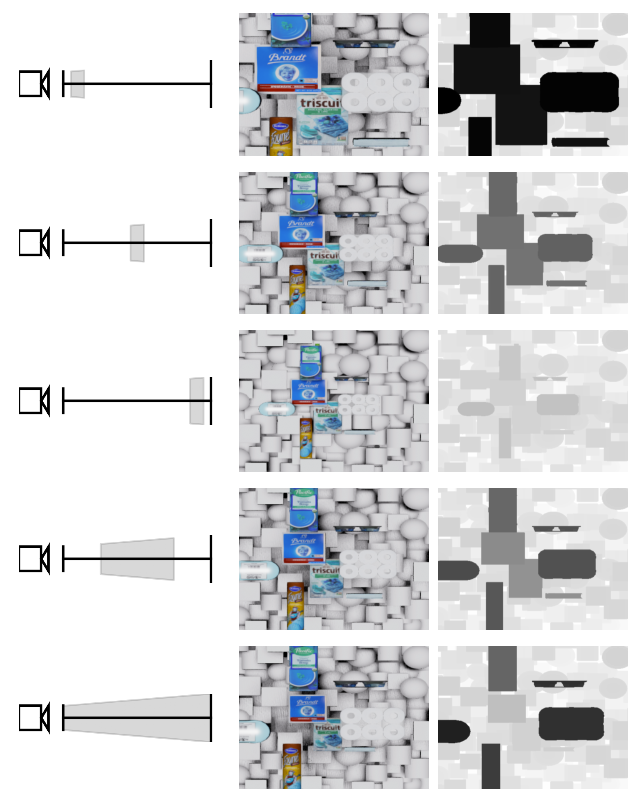

In [26]:
range_names = ['close', 'half', 'far', 'medium', 'full']
fig, ax = plt.subplots(5, 3, figsize=(6, 8))  # Adjusted for 5 rows, 3 columns
plt.rcParams.update({'font.size': 16})  # Increase font size
for i, path in enumerate([spatial_close_path, spatial_half_path, spatial_far_path, spatial_medium_path, spatial_full_path]):
    depth_image = cv2.imread(os.path.join(path, depth_folder, test_image), cv2.IMREAD_UNCHANGED)
    rgb_image = cv2.imread(os.path.join(path, RGB_folder, test_image), cv2.IMREAD_UNCHANGED)

    # Load the image for annotation
    img = mpimg.imread(f'images/{range_names[i]}.png')
    
    # Create an OffsetImage for annotation
    imagebox = OffsetImage(img, zoom=0.3)
    
    # Create AnnotationBbox to place the image on the plot
    # Adjust the xycoords to place the annotation to the left of the images
    ab = AnnotationBbox(imagebox, (0.4, 0.5), frameon=False, xycoords='axes fraction', boxcoords="axes fraction")

    # Resize rgb_image
    rgb_image = cv2.resize(rgb_image, (400, 300))
    depth_image = cv2.resize(depth_image, (400, 300))
    
    # Add the AnnotationBbox to the subplot for annotations
    ax[i, 0].add_artist(ab)
    ax[i, 0].axis("off")

    ax[i, 1].imshow(rgb_image)  # RGB image in the second column
    ax[i, 1].axis("off")

    ax[i, 2].imshow(depth_image, cmap="gray", vmin=0, vmax=255)  # Depth image in the third column
    ax[i, 2].axis("off")

plt.subplots_adjust(left=0.01,
                    bottom=0.01, 
                    right=0.99, 
                    top=0.99, 
                    wspace=0.05, 
                    hspace=0.05)
plt.show()

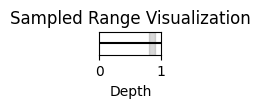

In [4]:
import matplotlib.pyplot as plt

# Define the range
depth_range = [0, 1]
sampled_range = [0.8, 0.9]

# Plotting
plt.figure(figsize=(0.8, 0.3))

# Plot the horizontal line from 0 to 1
plt.plot([depth_range[0], depth_range[1]], [0, 0], color='black')

# Shade the area representing the sampled range
plt.fill_betweenx(y=[-0.1, 0.1], x1=sampled_range[0], x2=sampled_range[1], color='gray', alpha=0.3)

# Set labels and title
plt.xlim(depth_range)
plt.ylim(-0.1, 0.1)
plt.xlabel('Depth')
plt.title('Sampled Range Visualization')

# Hide y-axis ticks and labels
plt.yticks([])

plt.show()

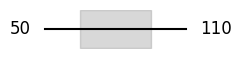

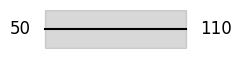

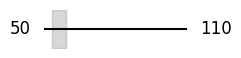

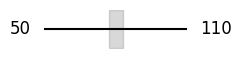

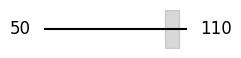

In [14]:
import matplotlib.pyplot as plt

# Define the range
range_names = ['medium', 'full', 'close', 'half', 'far']
sampled_ranges = [[0.25, 0.75], [0, 1], [0.05, 0.15], [0.45, 0.55], [0.85, 0.95]]
def plot_sample_range(sampled_range, filename):
    depth_range = [0, 1]

    # Plotting
    plt.figure(figsize=(2, 0.5))

    # Plot the horizontal line from 0 to 1
    plt.plot([depth_range[0], depth_range[1]], [0, 0], color='black')

    # Shade the area representing the sampled range
    plt.fill_betweenx(y=[-0.1, 0.1], x1=sampled_range[0], x2=sampled_range[1], color='gray', alpha=0.3)

    # Set labels and title
    plt.ylim(-0.1, 0.1)

    # Hide y-axis ticks and labels
    plt.yticks([])
    plt.axis('off')

    # Add depth labels slightly outside the plot
    label_offset = 0.1
    plt.text(depth_range[0] - label_offset, 0, '50', ha='right', va='center', fontsize=12)
    plt.text(depth_range[1] + label_offset, 0, '110', ha='left', va='center', fontsize=12)

    plt.savefig(filename, bbox_inches='tight', pad_inches=0, dpi=300)
    plt.show()

for range_name, sampled_range in zip(range_names, sampled_ranges):
    plot_sample_range(sampled_range, f'{range_name}.png')


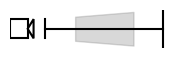

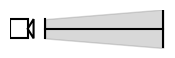

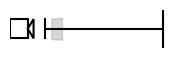

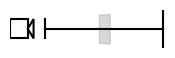

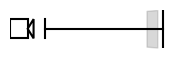

In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np


def plot_sample_range(sampled_range, filename):
    depth_range = [0, 1]

    # Plotting
    plt.figure(figsize=(2, 0.5))

    # Plot the horizontal line from 0 to 1
    plt.plot([depth_range[0], depth_range[1]], [0, 0], color='black')

    # Shade the area representing the sampled range
    # plt.fill_betweenx(y=[-0.1, 0.1], x1=sampled_range[0], x2=sampled_range[1], color='gray', alpha=0.3)

    # Set labels and title
    plt.ylim(-0.1, 0.1)
    plt.xlim(-0.3, 1.015)

    # Hide y-axis ticks and labels
    plt.yticks([])
    plt.axis('off')

    # Add the camera icon at the left side of the plot
    # camera_box = patches.Rectangle((-0.2, -0.05), 0.1, 0.1, edgecolor='black', facecolor='none', linewidth=1.5)
    # camera_triangle = patches.Polygon([(-0.3, 0), (-0.2, 0.05), (-0.2, -0.05)], closed=True, edgecolor='black', facecolor='none', linewidth=1.5)
    camera_box = patches.Rectangle((-0.3, -0.05), 0.15, 0.1, edgecolor='black', facecolor='none', linewidth=1.5)
    camera_triangle = patches.Polygon([(-0.15, 0), (-0.1, 0.05), (-0.1, -0.05)], closed=True, edgecolor='black', facecolor='none', linewidth=1.5)
    
    plt.gca().add_patch(camera_box)
    plt.gca().add_patch(camera_triangle)

    # plt.axvline(x=0, color='black', linewidth=1.5)
    # plt.axvline(x=1, color='black', linewidth=1.5)
    plt.plot([0, 0], [-0.05, 0.05], color='black', linewidth=1.5)
    plt.plot([1, 1], [-0.1, 0.1], color='black', linewidth=1.5)

    # y1 = x1 * 0.05 + 0.05
    # y2 = x2 * -0.05 + -0.05
    # x = [0, 1]
    x = np.linspace(0, 1, 100)
    y1 = lambda x: x * 0.05 + 0.05
    y2 = lambda x: x * -0.05 + -0.05

    # Shade the area between y1 and y2 and sampled_range[0] and sampled_range[1]
    plt.fill_between(x, y1(x), y2(x), where=(x >= sampled_range[0]) & (x <= sampled_range[1]), color='gray', alpha=0.3)

    plt.savefig(filename, bbox_inches='tight', pad_inches=0, dpi=300)
    plt.show()

for range_name, sampled_range in zip(range_names, sampled_ranges):
    plot_sample_range(sampled_range, f'{range_name}.png')


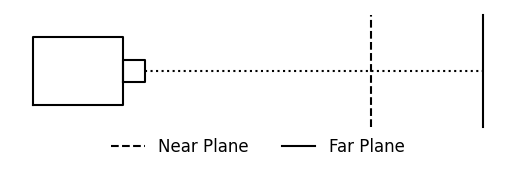

In [82]:
import matplotlib.pyplot as plt

# Function to plot the camera
def plot_camera():
    # Camera body
    plt.plot([0, 0, 4, 4, 0], [0, 3, 3, 0, 0], color='black')

    # Lens
    # plt.plot([4, 5, 5, 4, 4], [3, 3, 4, 4, 3], color='black')
    plt.plot([4, 5, 5, 4, 4], [1, 1, 2, 2, 1], color='black')

    # Near plane
    plt.plot([15, 15], [-1, 4], linestyle='dashed', color='black', label='Near Plane')

    # Far plane
    plt.plot([20, 20], [-1, 4], linestyle='solid', color='black', label='Far Plane')

    # Line from lens to near plane
    plt.plot([5, 20], [1.5, 1.5], linestyle='dotted', color='black')

    # Set axis limits and aspect ratio
    # plt.xlim(-1, 12)
    # plt.ylim(-1, 7)
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    # plt.title('2D Representation of Camera')
    plt.axis('off')
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2, frameon=False, fontsize=12)

    plt.show()

# Plot the camera
plot_camera()



{'SynthDet_spatial_bg_close': {'SynthDet_spatial_bg_close': {'RGB': [91.40100000000001,
                                                                     0.26893245744362687],
                                                             'RGB-D_CMX': [90.8095,
                                                                           0.32150000000000034],
                                                             'RGB-D_DFormer': [91.999,
                                                                               0.12299999999999756],
                                                             'RGB-D_TokenFusion': [93.1725,
                                                                                   0.08650000000000091]},
                               'SynthDet_spatial_bg_far': {'RGB': [89.592,
                                                                   0.5836991234074803],
                                                           'RGB-D_CMX': [1.4045,
          

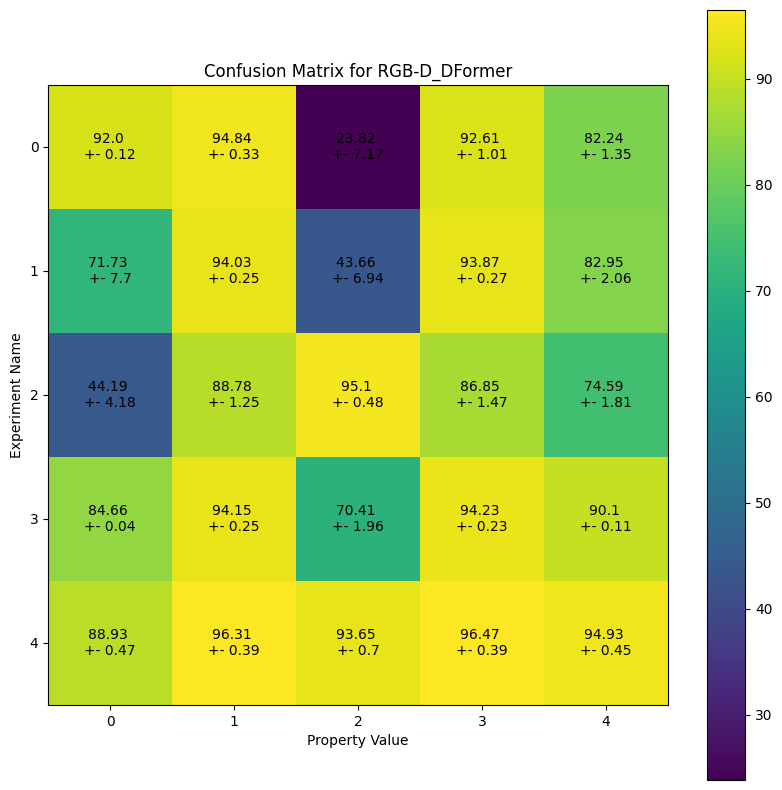

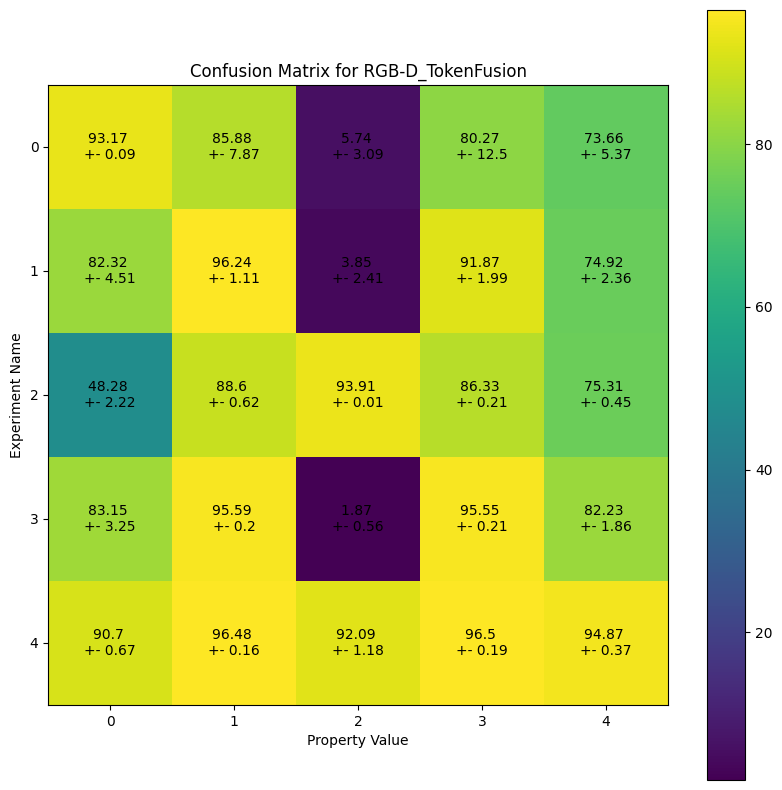

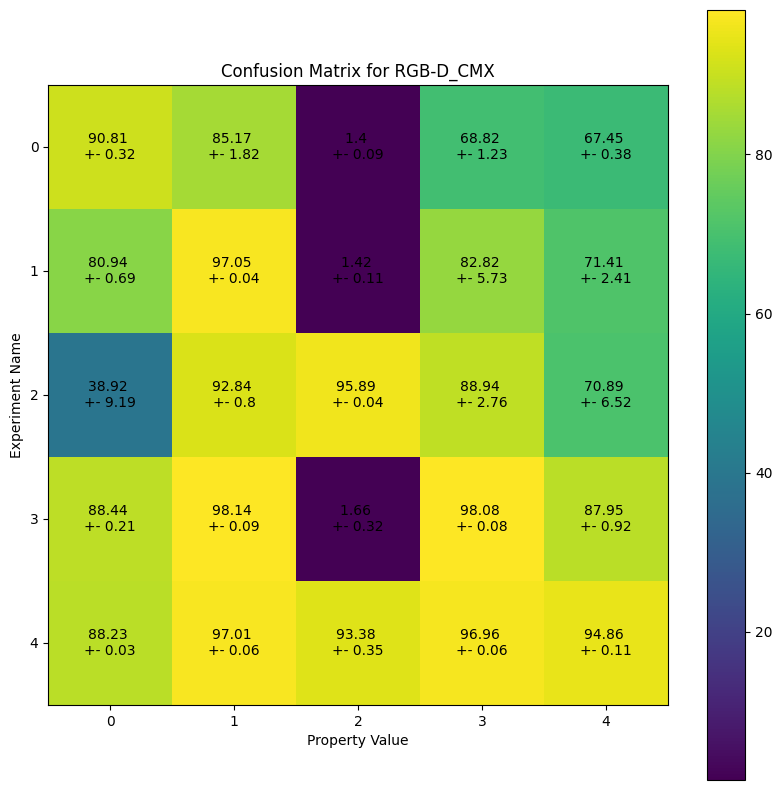

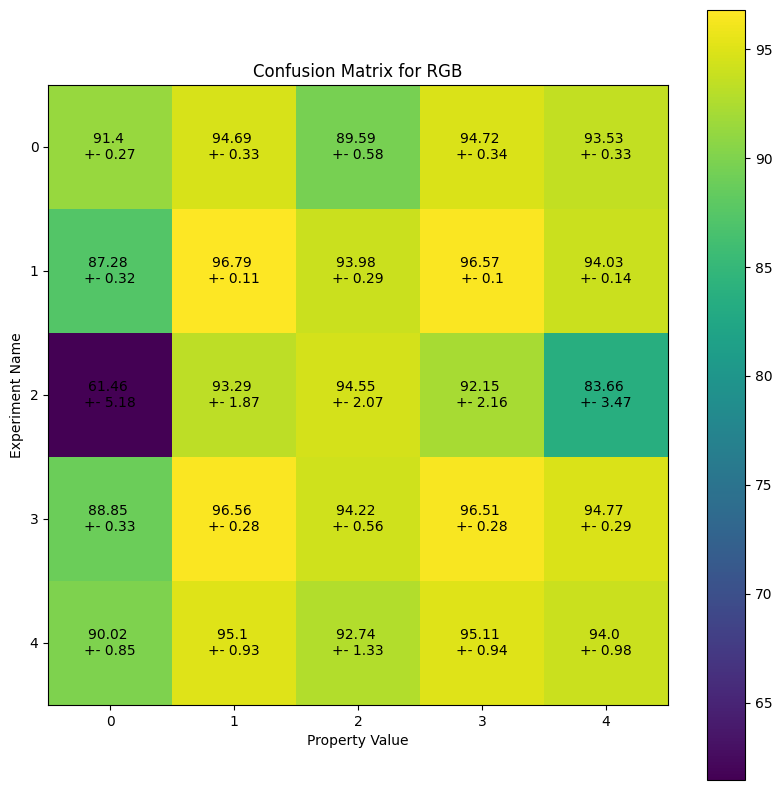

In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

def parse_DFormer_input_data(data):
    models_data = {}
    
    # Split the input data into models trained
    for model_trained_data in data.split("Model trained on dataset: ")[1:]:
        if not model_trained_data:
            continue
        
        # Dataset name is the first line of the model trained data
        model_lines = model_trained_data.split("\n")
        model_name = model_lines[0].strip()
        if model_name not in models_data:
            models_data[model_name] = {}

        # Split the model trained data into the different datasets
        for testing_data in model_trained_data.split("Dataset: ")[1:]:
            if not testing_data:
                continue
            
            # Dataset name is the first line of the testing data
            dataset_lines = testing_data.split("\n")
            dataset_name = dataset_lines[0].strip()
            if dataset_name not in models_data[model_name]:
                models_data[model_name][dataset_name] = {"RGB-D": [], "RGB": []}

            # Extract the mIoU values from the testing data
            for line in dataset_lines[1:]:
                if "RGB-D mIoU" in line or "RGBD mIoU" in line:
                    models_data[model_name][dataset_name]["RGB-D"].append(float(re.search(r"\d+\.\d+", line).group()))
                elif "RGB mIoU" in line:
                    models_data[model_name][dataset_name]["RGB"].append(float(re.search(r"\d+\.\d+", line).group()))
    
    return models_data

def aggregate_DFormer_data(file_paths):
    aggregated_data = {}
    for file_path in file_paths:
        with open(file_path, "r") as file:
            input_data = file.read()
            model_data = parse_DFormer_input_data(input_data)
            for model, datasets in model_data.items():
                if model not in aggregated_data:
                    aggregated_data[model] = {}
                for dataset, metrics in datasets.items():
                    if dataset not in aggregated_data[model]:
                        aggregated_data[model][dataset] = {"RGB-D": [], "RGB": []}
                    for metric, values in metrics.items():
                        aggregated_data[model][dataset][metric].extend(values)
    return aggregated_data

def parse_TokenFusion_input_data(data):
    models_data = {}
    
    # Split the input data into models trained
    for model_trained_data in data.split("Model trained on dataset: ")[1:]:
        if not model_trained_data:
            continue
        
        # Dataset name is the first line of the model trained data
        model_lines = model_trained_data.split("\n")
        model_name = model_lines[0].strip()
        models_data[model_name] = {}

        # Split the model trained data into the different datasets
        for testing_data in model_trained_data.split("Dataset: "):
            if not testing_data:
                continue
            
            # Dataset name is the first line of the testing data
            dataset_lines = testing_data.split("\n")
            dataset_name = dataset_lines[0].strip()
            models_data[model_name][dataset_name] = {}

            # Extract the mIoU values from the testing data
            for line in dataset_lines[1:]:
                if "RGB-D" in line or "RGBD" in line:
                    # RGB-D mIoU: [93.316, 92.097, 91.086]
                    # RGB-D is the first valueu, RGB the second and Depth the third
                    mIoU_values = re.findall(r"\d+\.\d+", line)
                    if len(mIoU_values) == 3:
                        models_data[model_name][dataset_name]["RGB-D"] = float(mIoU_values[0])
                        models_data[model_name][dataset_name]["RGB"] = float(mIoU_values[1])
                        models_data[model_name][dataset_name]["Depth"] = float(mIoU_values[2])
    
    return models_data

def aggregate_TokenFusion_data(file_paths): 
    aggregated_data = {}
    for file_path in file_paths:
        with open(file_path, "r") as file:
            input_data = file.read()
            model_data = parse_TokenFusion_input_data(input_data)
            for model, datasets in model_data.items():
                if model not in aggregated_data:
                    aggregated_data[model] = {}
                for dataset, metrics in datasets.items():
                    if dataset not in aggregated_data[model]:
                        aggregated_data[model][dataset] = {"RGB-D": [], "RGB": [], "Depth": []}
                    for metric, value in metrics.items():
                        aggregated_data[model][dataset][metric].append(value)
    return aggregated_data


def plot_data_potential(aggregated_data, metrics=None):
    num_train_datasets = len(aggregated_data)
    train_datasets = list(aggregated_data.keys())
    
    # Assume the test datasets are the same across different training datasets
    first_model = train_datasets[0]
    test_datasets = list(aggregated_data[first_model].keys())
    num_test_datasets = len(test_datasets)

    # plt.figure(figsize=(14, 8))
    fig, ax = plt.subplots(figsize=(14, 8))

    # Set up the bar width and positions
    bar_width = 0.15
    index = np.arange(num_train_datasets)
    
    for j, test_dataset in enumerate(test_datasets):
        rgb_d_values = [np.mean(aggregated_data[train_dataset][test_dataset]['RGB-D']) for train_dataset in train_datasets]
        rgb_d_errors = [np.std(aggregated_data[train_dataset][test_dataset]['RGB-D']) for train_dataset in train_datasets]
        
        rgb_values = [np.mean(aggregated_data[train_dataset][test_dataset]['RGB']) for train_dataset in train_datasets]
        rgb_errors = [np.std(aggregated_data[train_dataset][test_dataset]['RGB']) for train_dataset in train_datasets]
        
        bar_positions = index + j * bar_width

        # Overlay RGB bars on top of RGB-D bars with error bars offset to the right
        plt.bar(bar_positions, rgb_values, width=bar_width, alpha=0.3, hatch='//', label=f'(RGB)' if j == 0 else "_nolegend_")
        # plt.errorbar(bar_positions - 0.02, rgb_values, yerr=rgb_errors, fmt='none', ecolor='black', capsize=5, label='_nolegend_', capthick=2, elinewidth=2)


        # Plot RGB-D bars with error bars offset to the left
        plt.bar(bar_positions, rgb_d_values, width=bar_width, alpha=1, label=f'{test_dataset.split("bg_")[-1]} (RGB-D)')
        # plt.errorbar(bar_positions + 0.02, rgb_d_values, yerr=rgb_d_errors, fmt='none', ecolor='black', capsize=5, alpha=1, label='_nolegend_', capthick=2, elinewidth=2)

        
    # Adjust the x-axis to have the dataset names centered under the group of bars
    mid_positions = index + bar_width * (num_test_datasets - 1) / 2
    stripped_train_dataset_names = [dataset.split("bg_")[-1] for dataset in train_datasets]
    plt.xticks(mid_positions, stripped_train_dataset_names, rotation=45, ha='right')

    plt.ylim(0, 100)
    plt.xlabel('Training Datasets')
    plt.ylabel('mIoU')
    plt.title('mIoU for Different Training Datasets')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()


# List of input files
input_files = glob("../checkpoints_spatial_groceries/log_*.txt")
final_files = []
for file in input_files:
    if "copy" in file:
        continue
    final_files.append(file) 
    
# Aggregate data from all input files
DFormer_aggregated_data = aggregate_DFormer_data(final_files)

# Remove all "RGB" labels from aggregated data
for model, data in DFormer_aggregated_data.items():
    for dataset, metrics in data.items():
        metrics.pop("RGB", None)

# Remove all datasets that contain the word "white_flat"
for model, data in DFormer_aggregated_data.items():
    for dataset in list(data.keys()):
        if "white_flat" in dataset:
            data.pop(dataset, None)

# List of input files
input_files = glob("../checkpoints_spatial_groceries_SF/log_*.txt")
final_files = []
for file in input_files:
    if "copy" in file:
        continue
    final_files.append(file) 
    
# Aggregate data from all input files
SegFormer_aggregated_data = aggregate_DFormer_data(final_files)

# List of input files
input_files = glob("../checkpoints_spatial_groceries_CMX/log_*.txt")
final_files = []
for file in input_files:
    if "copy" in file:
        continue
    final_files.append(file) 
    
# Aggregate data from all input files
CMX_aggregated_data = aggregate_DFormer_data(final_files)

input_files = glob("../checkpoints_spatial_groceries_TF/log_*.txt")
final_files = []
for file in input_files:
    if "copy" in file:
        continue
    final_files.append(file) 

TokenFusion_aggregated_data = aggregate_TokenFusion_data(final_files)

# Print the aggregated data to verify
import pprint
# pprint.pprint(DFormer_aggregated_data)
# pprint.pprint(TokenFusion_aggregated_data)

# Fuse the aggregated data, where RGB-D in DFormer corresponds to RGB-D in TokenFusion
aggregated_data = {}
for model, data in DFormer_aggregated_data.items():
    aggregated_data[model] = {}
    for dataset, metrics in data.items():
        aggregated_data[model][dataset] = {"RGB-D": metrics["RGB-D"] + TokenFusion_aggregated_data[model][dataset]["RGB-D"] + CMX_aggregated_data[model][dataset]["RGB-D"], "RGB": SegFormer_aggregated_data[model][dataset]["RGB"]}

# pprint.pprint(aggregated_data)

aggregate_d_data = {}
for experiment_name, data in DFormer_aggregated_data.items():
    aggregate_d_data[experiment_name] = {}
    for property_value, metrics in data.items():
        aggregate_d_data[experiment_name][property_value] = {
            "RGB-D_DFormer": [np.mean(metrics["RGB-D"]), np.std(metrics["RGB-D"])],
            "RGB-D_TokenFusion": [np.mean(TokenFusion_aggregated_data[experiment_name][property_value]["RGB-D"]), np.std(TokenFusion_aggregated_data[experiment_name][property_value]["RGB-D"])],
            "RGB-D_CMX": [np.mean(CMX_aggregated_data[experiment_name][property_value]["RGB-D"]), np.std(CMX_aggregated_data[experiment_name][property_value]["RGB-D"])],
            "RGB": [np.mean(SegFormer_aggregated_data[experiment_name][property_value]["RGB"]), np.std(SegFormer_aggregated_data[experiment_name][property_value]["RGB"])]
        }

pprint.pprint(aggregate_d_data)

# Create a confusion matrix per data modality + model

models = ["RGB-D_DFormer", "RGB-D_TokenFusion", "RGB-D_CMX", "RGB"]
test_datasets = ['SynthDet_spatial_bg_close', 'SynthDet_spatial_bg_half', 'SynthDet_spatial_bg_far', 'SynthDet_spatial_bg_medium', 'SynthDet_spatial_bg_full']
train_datasets = test_datasets
datasets = [train_dataset.split("bg_")[-1] for train_dataset in train_datasets]

for model_spec in models:
    confusion_matrix = np.zeros((5, 5))
    for i, train_dataset in enumerate(train_datasets):
        for j, test_dataset in enumerate(test_datasets):
            confusion_matrix[i, j] = aggregate_d_data[train_dataset][test_dataset][model_spec][0]
    # plt.imshow(confusion_matrix, cmap='viridis')
    # Show values in confusion matrix
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(confusion_matrix, cmap='viridis')
    for i in range(5):
        for j in range(5):
            # text = ax.text(j, i, round(confusion_matrix[i, j], 2), ha="center", va="center", color="black")
            # Add miou +- std
            text = ax.text(j, i, f"{round(confusion_matrix[i, j], 2)} \n+- {round(aggregate_d_data[train_datasets[i]][test_datasets[j]][model_spec][1], 2)}", ha="center", va="center", color="black")
    plt.title(f"Confusion Matrix for {model_spec}")
    plt.xlabel("Property Value")
    plt.ylabel("Experiment Name")
    # Colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    plt.show()


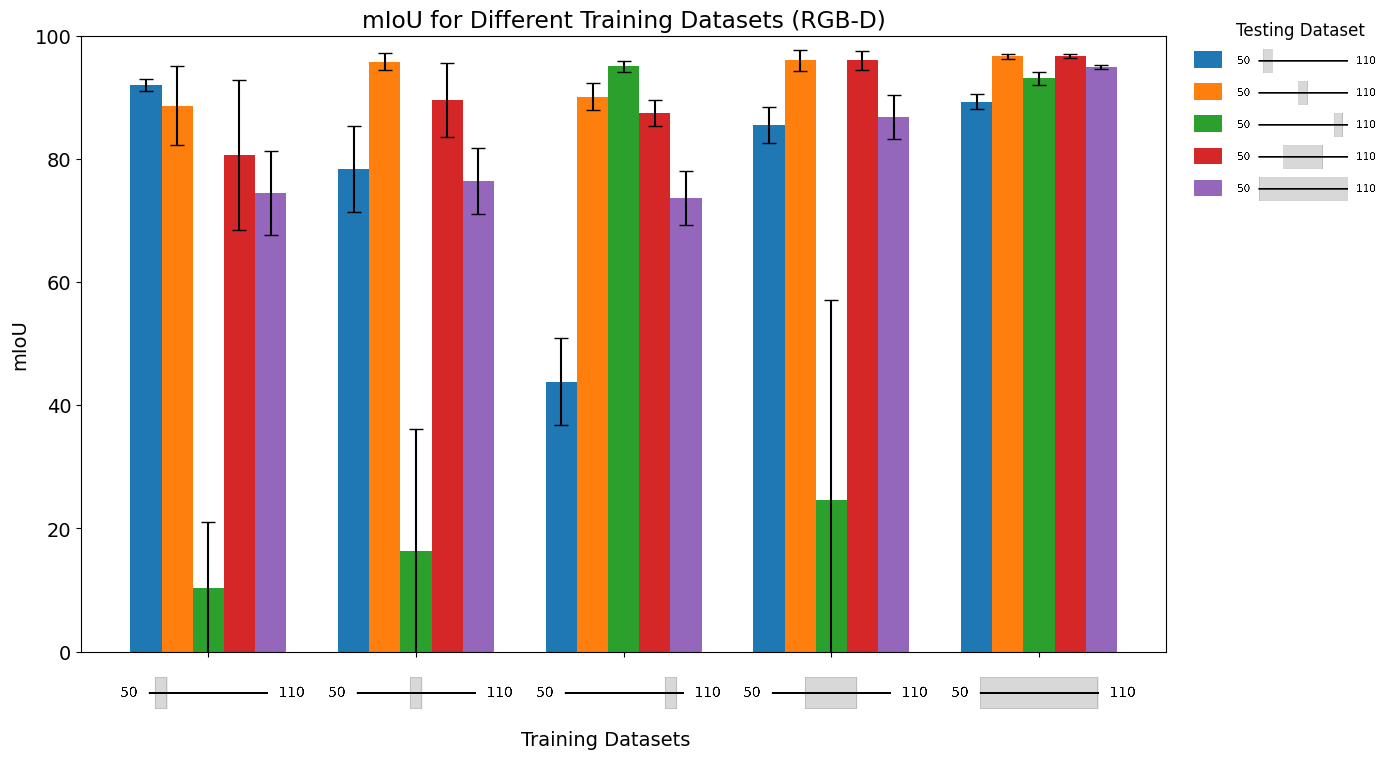

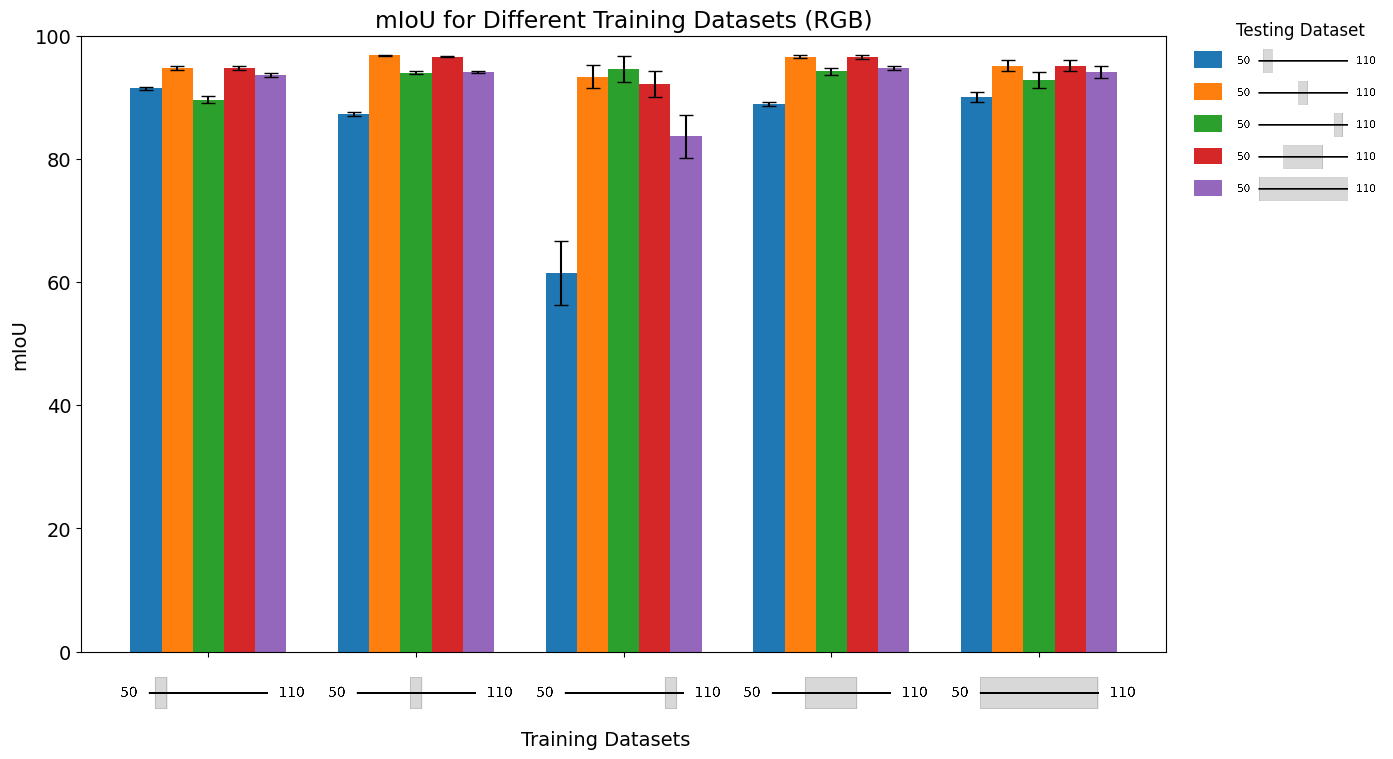

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

plt.rcParams.update({'font.size': 14})


def plot_data(aggregated_data, metrics=['RGB-D', 'RGB']):
    num_train_datasets = len(aggregated_data)
    train_datasets = list(aggregated_data.keys())
    
    # Assume the test datasets are the same across different training datasets
    first_model = train_datasets[0]
    # test_datasets = list(aggregated_data[first_model].keys())
    test_datasets = ['SynthDet_spatial_bg_close', 'SynthDet_spatial_bg_half', 'SynthDet_spatial_bg_far', 'SynthDet_spatial_bg_medium', 'SynthDet_spatial_bg_full']
    train_datasets = test_datasets
    num_test_datasets = len(test_datasets)

    for metric in metrics:
        # plt.figure(figsize=(14, 8))
        fig, ax = plt.subplots(figsize=(14, 8))

        # Set up the bar width and positions
        bar_width = 0.15
        index = np.arange(num_train_datasets)
        
        bar_colors = []
        for j, test_dataset in enumerate(test_datasets):
            values = [np.mean(aggregated_data[train_dataset][test_dataset][metric]) for train_dataset in train_datasets]
            errors = [np.std(aggregated_data[train_dataset][test_dataset][metric]) for train_dataset in train_datasets]
            bar_positions = index + j * bar_width
            bars = ax.bar(bar_positions, values, width=bar_width, yerr=errors, capsize=5, label=f'{test_dataset.split("bg_")[-1]} ({metric})')
            # print([bar.get_facecolor() for bar in bars])
            # bar_colors.extend([bar.get_facecolor() for bar in bars])
            bar_colors.append(bars[0].get_facecolor())

        # Adjust the x-axis to have the dataset names centered under the group of bars
        mid_positions = index + bar_width * (num_test_datasets - 1) / 2
        stripped_train_dataset_names = [dataset.split("bg_")[-1] for dataset in train_datasets]
        # plt.xticks(mid_positions, stripped_train_dataset_names, rotation=45, ha='right')
        plt.xticks(mid_positions, ['' for dataset in train_datasets])

        for i, dataset in enumerate(train_datasets):
            img = mpimg.imread(f'images/{dataset.split("bg_")[-1]}.png')
            # img = rotate(img, 45, reshape=True)
            imagebox = OffsetImage(img, zoom=0.2)
            ab = AnnotationBbox(imagebox, (index[i], 0), frameon=False, xycoords='data', boxcoords="offset points", pad=0, xybox=(48, -30))
            ax.add_artist(ab)

        plt.ylim(0, 100)
        # plt.xlabel('Training Datasets')
        fig.text(0.5, 0, 'Training Datasets', ha='center', va='center')
        plt.ylabel('mIoU')
        plt.title(f'mIoU for Different Training Datasets ({metric})')

        handles, labels = ax.get_legend_handles_labels()
        legend_elements = []
        for color, label in zip(bar_colors, labels):
            img_name = label.split(' (')[0]
            img = mpimg.imread(f'images/{img_name}.png')
            imagebox = OffsetImage(img, zoom=0.15)
            ab = AnnotationBbox(imagebox, (0, 0), frameon=False)
            legend_elements.append((ab, color))
        
        # Add a legend axis on the right, closer to the plot
        legend_ax = fig.add_axes([0.85, 0.5, 0.1, 0.4])
        legend_ax.annotate("Testing Dataset", xy=(1, 0.95), xycoords='axes fraction', fontsize=12)
        legend_ax.axis('off')
        for i, (ab, color) in enumerate(legend_elements):
            rect = plt.Rectangle((0.7, 0.85 - i * 0.1), 0.2, 0.05, fc=color, edgecolor='none', transform=legend_ax.transAxes)
            legend_ax.add_patch(rect)
            ab.xybox = (1.5, 0.87 - i * 0.1)
            legend_ax.add_artist(ab)
            legend_ax.annotate("", xy=(2.5, 0.9 - i * 0.1), xycoords='axes fraction', fontsize=10,
                               bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
        plt.show()

plot_data(aggregated_data, metrics = ['RGB-D', 'RGB'])

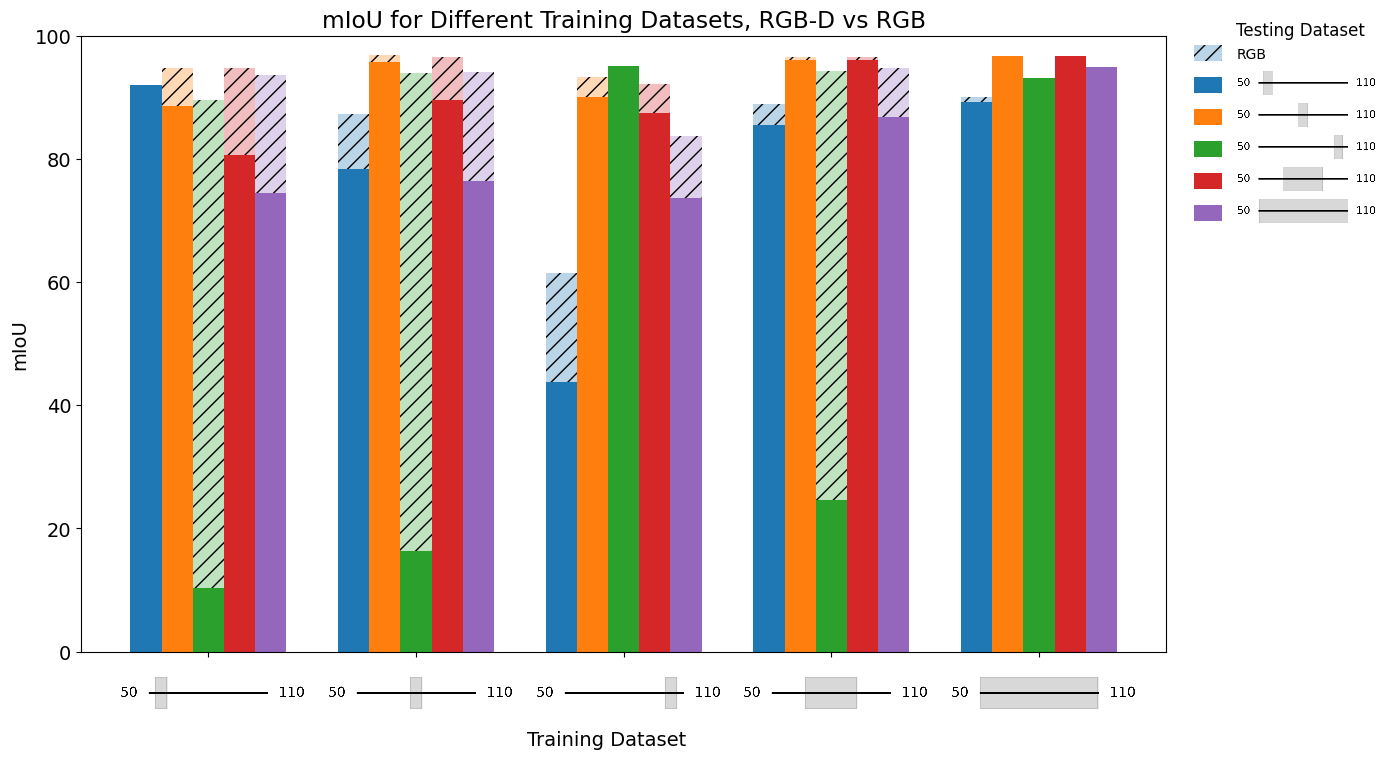

In [3]:
def plot_data_potential(aggregated_data):
    num_train_datasets = len(aggregated_data)
    train_datasets = list(aggregated_data.keys())
    
    # Assume the test datasets are the same across different training datasets
    first_model = train_datasets[0]
    test_datasets = list(aggregated_data[first_model].keys())
    num_test_datasets = len(test_datasets)

    test_datasets = ['SynthDet_spatial_bg_close', 'SynthDet_spatial_bg_half', 'SynthDet_spatial_bg_far', 'SynthDet_spatial_bg_medium', 'SynthDet_spatial_bg_full']
    train_datasets = test_datasets

    # plt.figure(figsize=(14, 8))
    fig, ax = plt.subplots(figsize=(14, 8))

    # Set up the bar width and positions
    bar_width = 0.15
    index = np.arange(num_train_datasets)

    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    
    bar_colors = []
    for j, test_dataset in enumerate(test_datasets):
        rgb_d_values = [np.mean(aggregated_data[train_dataset][test_dataset]['RGB-D']) for train_dataset in train_datasets]
        rgb_d_errors = [np.std(aggregated_data[train_dataset][test_dataset]['RGB-D']) for train_dataset in train_datasets]
        
        rgb_values = [np.mean(aggregated_data[train_dataset][test_dataset]['RGB']) for train_dataset in train_datasets]
        rgb_errors = [np.std(aggregated_data[train_dataset][test_dataset]['RGB']) for train_dataset in train_datasets]
        
        bar_positions = index + j * bar_width

        bars_rgb = ax.bar(bar_positions, rgb_values, width=bar_width, alpha=0.3, color=colors[j % len(colors)], hatch='//', label=f'(RGB)' if j == 0 else "_nolegend_")
        bars_rgb_d = ax.bar(bar_positions, rgb_d_values, width=bar_width, alpha=1,color=colors[j % len(colors)], label=f'{test_dataset.split("bg_")[-1]} (RGB-D)')
        
        if j == 0:
            bar_colors.append(bars_rgb[0].get_facecolor())

        bar_colors.append(bars_rgb_d[0].get_facecolor())

        # Adjust the x-axis to have the dataset names centered under the group of bars
        mid_positions = index + bar_width * (num_test_datasets - 1) / 2
        stripped_train_dataset_names = [dataset.split("bg_")[-1] for dataset in train_datasets]
        # plt.xticks(mid_positions, stripped_train_dataset_names, rotation=45, ha='right')
        plt.xticks(mid_positions, ['' for dataset in train_datasets])

        for i, dataset in enumerate(train_datasets):
            img = mpimg.imread(f'images/{dataset.split("bg_")[-1]}.png')
            # img = rotate(img, 45, reshape=True)
            imagebox = OffsetImage(img, zoom=0.2)
            ab = AnnotationBbox(imagebox, (index[i], 0), frameon=False, xycoords='data', boxcoords="offset points", pad=0, xybox=(48, -30))
            ax.add_artist(ab)
    plt.ylim(0, 100)
    # plt.xlabel('Training Datasets')
    fig.text(0.5, 0, 'Training Dataset', ha='center', va='center')
    plt.ylabel('mIoU')
    plt.title(f'mIoU for Different Training Datasets, RGB-D vs RGB')

    handles, labels = ax.get_legend_handles_labels()
    legend_elements = []
    for color, label in zip(bar_colors, labels):
        if label == "(RGB)":
            legend_elements.append((None, color))
            continue
        img_name = label.split(' (')[0]
        img = mpimg.imread(f'images/{img_name}.png')
        imagebox = OffsetImage(img, zoom=0.15)
        ab = AnnotationBbox(imagebox, (0, 0), frameon=False)
        legend_elements.append((ab, color))
    
    # Add a legend axis on the right, closer to the plot
    legend_ax = fig.add_axes([0.85, 0.5, 0.1, 0.4])
    legend_ax.annotate("Testing Dataset", xy=(1, 0.95), xycoords='axes fraction', fontsize=12)
    legend_ax.axis('off')
    for i, (ab, color) in enumerate(legend_elements):
        if ab is None:
            rect = plt.Rectangle((0.7, 0.87 - i * 0.1), 0.2, 0.05, fc=color, hatch='//', transform=legend_ax.transAxes)
            legend_ax.add_patch(rect)
            legend_ax.annotate("RGB", xy=(1, 0.88), xycoords='axes fraction', fontsize=10)
        else:
            rect = plt.Rectangle((0.7, 0.87 - i * 0.1), 0.2, 0.05, fc=color, edgecolor='none', transform=legend_ax.transAxes)
            legend_ax.add_patch(rect)
            ab.xybox = (1.5, 0.9 - i * 0.1)
            legend_ax.add_artist(ab)

    plt.show()

plot_data_potential(aggregated_data)

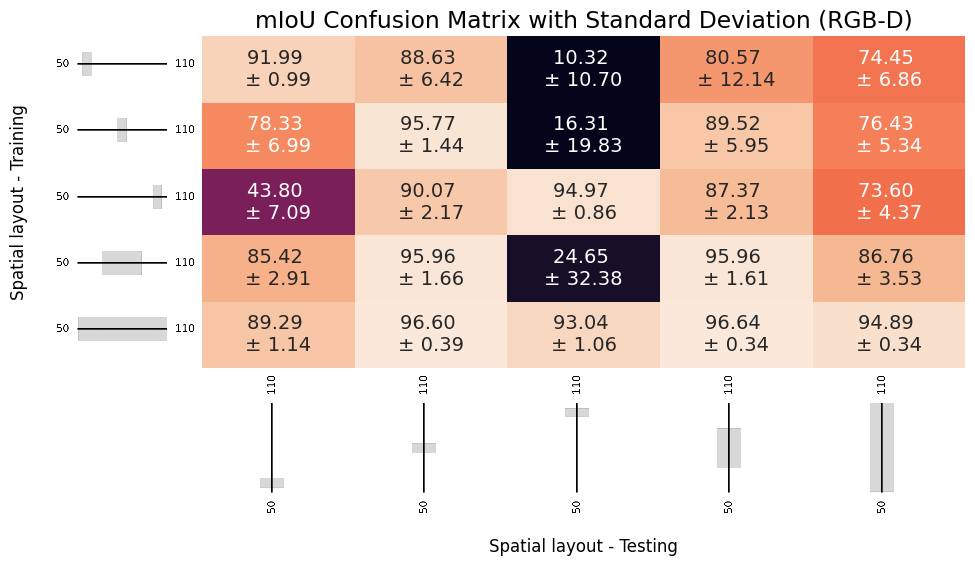

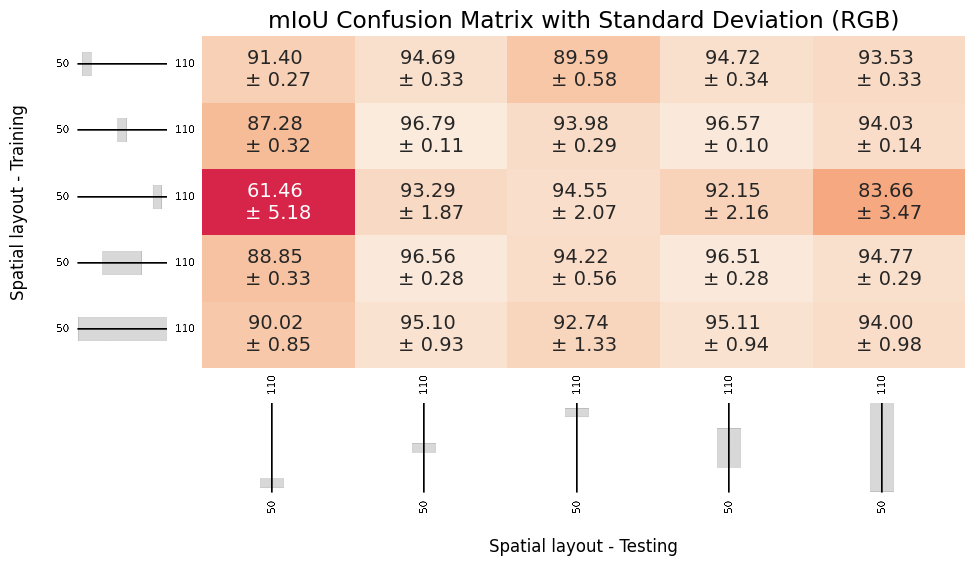

In [4]:
import matplotlib.image as mpimg
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy.ndimage import rotate

def plot_combined_heatmap_errorbars(aggregated_data, metrics=['RGB-D', 'RGB']):
    global_min = 20
    global_max = 97


    # plt.figure(figsize=(10, 14))
    for metric in metrics:
        # Prepare the data matrix
        mean_matrix = np.zeros((len(aggregated_data), len(aggregated_data)))
        std_matrix = np.zeros((len(aggregated_data), len(aggregated_data)))
        models = list(aggregated_data.keys())
        # datasets = [dataset.split("bg_")[-1] for dataset in aggregated_data[models[0]].keys()]

        
        test_datasets = ['SynthDet_spatial_bg_close', 'SynthDet_spatial_bg_half', 'SynthDet_spatial_bg_far', 'SynthDet_spatial_bg_medium', 'SynthDet_spatial_bg_full']
        train_datasets = test_datasets
        datasets = [train_dataset.split("bg_")[-1] for train_dataset in train_datasets]

        for i, model in enumerate(train_datasets):
            for j, dataset in enumerate(test_datasets):
                # print("model: ", model, "Dataset: ", dataset, " metrics: :", aggregated_data[model][dataset][metric])
                mean_matrix[i, j] = np.mean(aggregated_data[model][dataset][metric])
                std_matrix[i, j] = np.std(aggregated_data[model][dataset][metric])

        # Create the annotated data with mean ± std
        annotated_data = np.empty_like(mean_matrix, dtype=object)
        for i in range(len(models)):
            for j in range(len(datasets)):
                annotated_data[i, j] = f'{mean_matrix[i, j]:.2f} \n± {std_matrix[i, j]:.2f}'

        fig, ax = plt.subplots(figsize=(10, 7))

        # Heatmap
        # sns.heatmap(mean_matrix, annot=annotated_data, fmt='', xticklabels=[], yticklabels=[], cbar_kws={'label': 'mIoU'}, ax=ax)
        sns.heatmap(mean_matrix, annot=annotated_data, fmt='', xticklabels=[], yticklabels=[], cbar=None, ax=ax, vmin=global_min, vmax=global_max)
        ax.set_title(f'mIoU Confusion Matrix with Standard Deviation ({metric})')

        # Add images as labels for y-axis (rotated 90 degrees)
        for i, dataset in enumerate(train_datasets):
            img = mpimg.imread(f'images/{dataset.split("bg_")[-1]}.png')
            imagebox = OffsetImage(img, zoom=0.15)
            ab = AnnotationBbox(imagebox, (0, i), frameon=False, xycoords='data', boxcoords="offset points", pad=0, xybox=(-55, -20))
            ax.add_artist(ab)

        # Add images as labels for x-axis
        for i, dataset in enumerate(test_datasets):
            img = mpimg.imread(f'images/{dataset.split("bg_")[-1]}.png')
            img = np.rot90(img)  # Rotate the image by 90 degrees
            imagebox = OffsetImage(img, zoom=0.15)
            ab = AnnotationBbox(imagebox, (i, len(datasets)), frameon=False, xycoords='data', boxcoords="offset points", pad=0, xybox=(50, -55))
            ax.add_artist(ab)

        # Add custom text labels
        # For the y-axis (Training Dataset)
        ax.text(-1.2, len(datasets) / 2, 'Spatial layout - Training', va='center', ha='center', rotation=90, fontsize=12)

        # For the x-axis (Testing Dataset)
        ax.text(len(datasets) / 2, len(datasets) + 2.7, 'Spatial layout - Testing', va='center', ha='center', fontsize=12)

        plt.tight_layout()
        plt.show()

plot_combined_heatmap_errorbars(aggregated_data)